#  Daten Visualisierung und Daten Exploration

Heute lernen wie wir Daten explorieren und visualisieren

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler  # zwischen 0 und 1
from sklearn.preprocessing import StandardScaler  # Standardisieren
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

## Exploratory Data Engineering

#### Pandas ist eine der führenden Data Science Libraries und wird in der Praxis vor allem für explorative Datenanalyse verwendet.

Das erste Konzept sind *Series*, diese sind grob gesprochen Arrays mit Label für die Daten.
Die Dokumentation finden Sie [hier](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series)

In [2]:
series = pd.Series({"a": 1, "b": 2, "c": 3})
series

a    1
b    2
c    3
dtype: int64

In [3]:
series.values

array([1, 2, 3])

In [4]:
series.index

Index(['a', 'b', 'c'], dtype='object')

In [5]:
series["b"]

2

#### Dataframes: pandas dataframes sind vermutlich das wichtigste Konzept und kann Tabellenartige Daten darstellen

In [6]:
df = pd.DataFrame(data={"col1": [8, 9, 10], "col2": [3, 4, 1], "col3": [5, 6, 100]})
df  # wie Sie sehen fügt pandas automatisch indizes an die Zeilen an

,col1,col2,col3
0,8,3,5
1,9,4,6
2,10,1,100


In [7]:
df["col1"]  # Spalte auslesen

0     8
1     9
2    10
Name: col1, dtype: int64

In [8]:
df[["col1", "col3"]]  # mehrere Spalten auslesen

,col1,col3
0,8,5
1,9,6
2,10,100


In [9]:
df[1:3]  # Zeilen Auslesen mit slicing, feste indizes
df[1:]  # 1 bis Ende

,col1,col2,col3
1,9,4,6
2,10,1,100


In [10]:
# Spalte entfernen, axis zeigt die Richtung, axis = 0 ist Zeilenweise, axis = 1 Spaltenweise
df.drop(["col2"], axis=1)

,col1,col3
0,8,5
1,9,6
2,10,100


In [11]:
other_df = pd.DataFrame.from_dict([{"col1": 11, "col2": 22, "col3": 33}])
# Frage an Sie: Warum ignore index?
pd.concat([df, other_df], ignore_index=True)

,col1,col2,col3
0,8,3,5
1,9,4,6
2,10,1,100
3,11,22,33


In [12]:
# Lesen von CSV (Comma Seperated Values), die sie aus der letzten Hausaufgabe kennen
heart_data = pd.read_csv("data/heart_unclean.csv")
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0.0
1,49.0,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1.0
2,37.0,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0.0
3,48.0,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,NaN,1.0
4,54.0,M,NAP,150.0,NaN,0.0,Normal,122.0,N,0.0,Up,0.0


In [13]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             901 non-null    float64
 1   Sex             906 non-null    object 
 2   ChestPainType   900 non-null    object 
 3   RestingBP       899 non-null    float64
 4   Cholesterol     900 non-null    float64
 5   FastingBS       904 non-null    float64
 6   RestingECG      898 non-null    object 
 7   MaxHR           892 non-null    float64
 8   ExerciseAngina  896 non-null    object 
 9   Oldpeak         896 non-null    float64
 10  ST_Slope        897 non-null    object 
 11  HeartDisease    898 non-null    float64
dtypes: float64(7), object(5)
memory usage: 86.2+ KB


In [14]:
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,901.000000,899.000000,900.000000,904.000000,892.000000,896.000000,898.000000
mean,53.489456,132.395996,198.657778,0.231195,136.706278,0.876897,0.550111
std,9.452639,18.482551,109.555724,0.421830,25.481514,1.060458,0.497760
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,172.750000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.500000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,155.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### NaN / Null Werte zählen

In [15]:
heart_data.isnull().sum().sort_values(ascending=False)

MaxHR             26
ExerciseAngina    22
Oldpeak           22
ST_Slope          21
RestingECG        20
HeartDisease      20
RestingBP         19
ChestPainType     18
Cholesterol       18
Age               17
FastingBS         14
Sex               12
dtype: int64

## Plotting Numerical and Categorial Features

In [16]:
%matplotlib inline

In [17]:
numeric_features = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak", "FastingBS"]
categorical_features = [
    "Sex",
    "ChestPainType",
    "RestingECG",
    "ExerciseAngina",
    "ST_Slope",
]

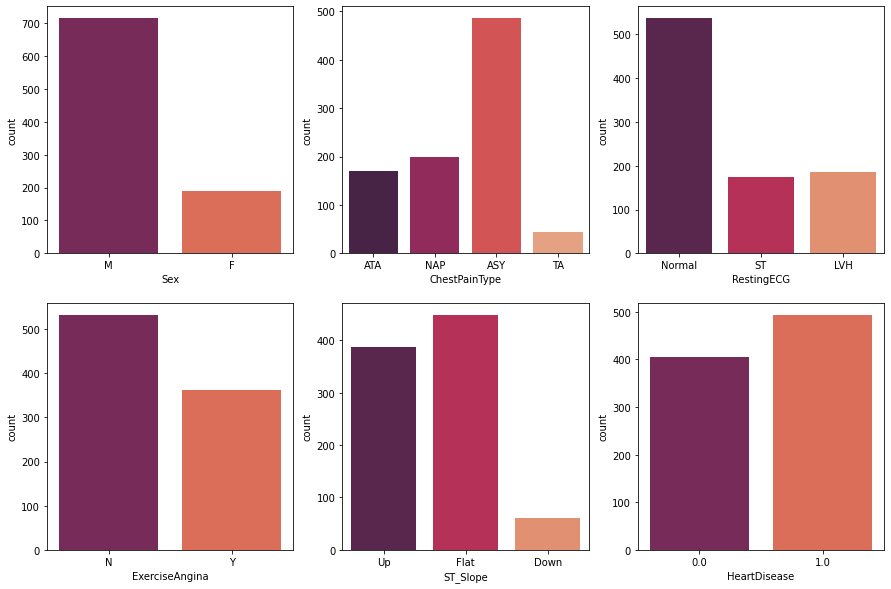

In [18]:
f, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, k in enumerate(categorical_features + ["HeartDisease"]):
    sns.countplot(x=heart_data[k], data=heart_data, palette="rocket", ax=axes.flat[i])
plt.show()

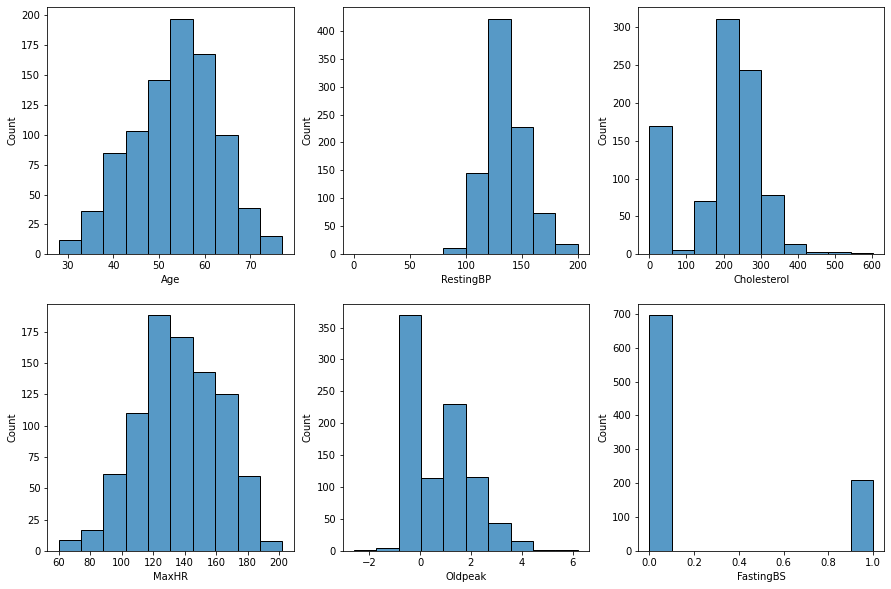

In [19]:
f, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, k in enumerate([x for x in numeric_features]):
    cat = heart_data[k].unique()
    sns.histplot(
        x=heart_data[k], data=heart_data[k], palette="rocket", ax=axes.flat[i], bins=10
    )
plt.show()

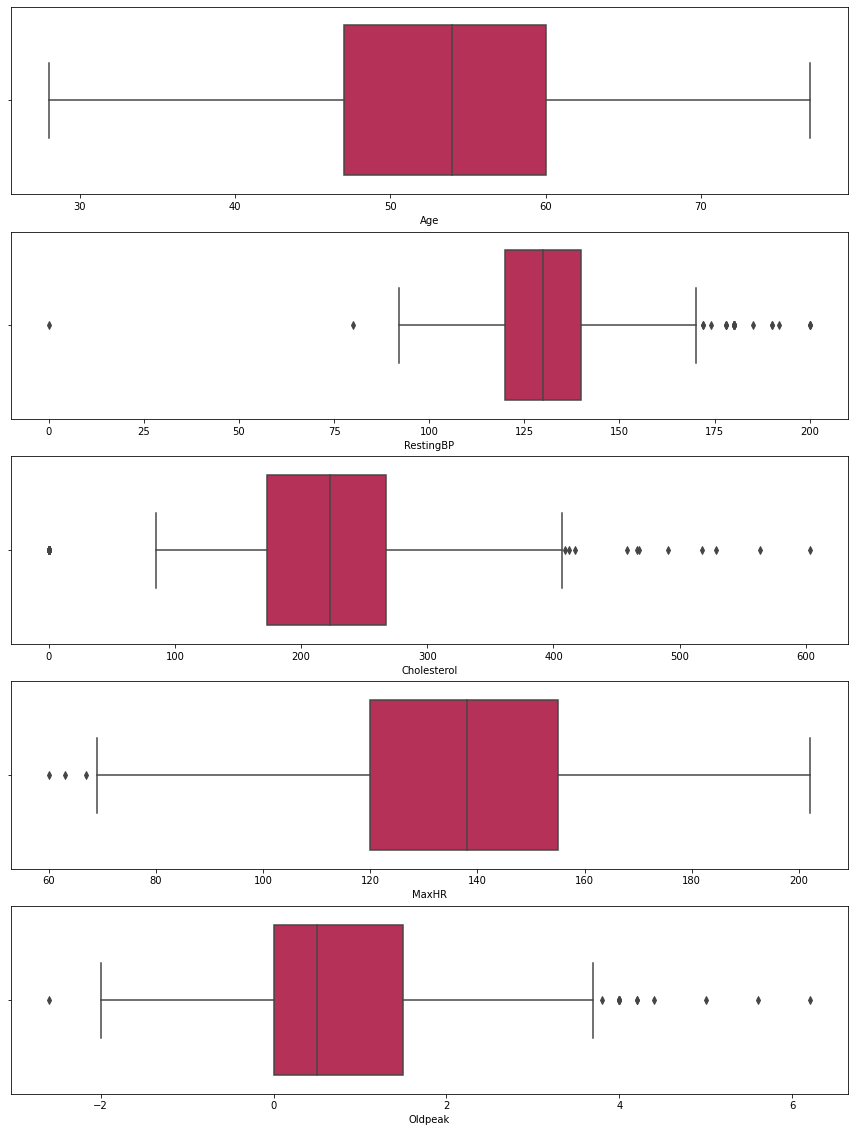

In [20]:
f, axes = plt.subplots(len(numeric_features) - 1, 1, figsize=(15, 20))

for i, k in enumerate([x for x in numeric_features if x != "FastingBS"]):
    sns.boxplot(
        x=heart_data[k],
        data=heart_data[k],
        palette="rocket",
        ax=axes.flat[i],
        orient="h",
    )
plt.show()

## Categorial Encoding

### One Hot Encoder

#### Beispieldaten

In [21]:
onehot_enc = OneHotEncoder(handle_unknown="ignore")

X = pd.DataFrame(data=["Apfel", "Birne", "Olivenöl"], columns=["Speise"])

#### FIT - generiert die Kategorien

In [22]:
onehot_enc.fit(X)

OneHotEncoder(handle_unknown='ignore')

In [23]:
# Kategorien
onehot_enc.categories_

[array(['Apfel', 'Birne', 'Olivenöl'], dtype=object)]

In [24]:
# Transformation der Daten
X2 = pd.DataFrame(
    data=["Birne", "Birne", "Apfel", "Birne", "Olivenöl"], columns=["Speise"]
)
onehot_enc.transform(X2).toarray()

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [25]:
onehot_enc.inverse_transform([[1, 0, 0], [0, 1, 0]])

array([['Apfel'],
       ['Birne']], dtype=object)

### Label Encoder

In [26]:
le = LabelEncoder()
le.fit(["Orange", "Apfel", "Birne"])

LabelEncoder()

In [27]:
le.classes_

array(['Apfel', 'Birne', 'Orange'], dtype='<U6')

In [28]:
le.transform(["Birne", "Birne", "Apfel", "Orange"])

array([1, 1, 0, 2])

In [29]:
le.inverse_transform([0, 0, 1, 2])

array(['Apfel', 'Apfel', 'Birne', 'Orange'], dtype='<U6')

### Scaling

In [30]:
scaler = StandardScaler()
age = heart_data["Age"]

In [31]:
# Mean und Var vor der Skalierung
print("Mean: ", age.mean(), "Variance: ", age.var())

Mean:  53.48945615982242 Variance:  89.35238870390923


In [32]:
heart_copy = heart_data.copy()
# fit_transform initialisiert den scaler und führt ihn direkt aus
heart_copy["Age"] = scaler.fit_transform(heart_data[["Age"]])

scaled_age = heart_copy["Age"]
print("Mean: ", scaled_age.mean(), "Variance: ", scaled_age.var())

Mean:  3.2407175968525657e-16 Variance:  1.0011111111111093


### Imputer: Einfügen von fehlenden Werten

In [33]:
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0.0
1,49.0,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1.0
2,37.0,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0.0
3,48.0,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,NaN,1.0
4,54.0,M,NAP,150.0,NaN,0.0,Normal,122.0,N,0.0,Up,0.0


In [34]:
# Beispiel für einen fehlenden Cholestrinwert
heart_data.iloc[4:5]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
4,54.0,M,NAP,150.0,NaN,0.0,Normal,122.0,N,0.0,Up,0.0


In [35]:
imputer = SimpleImputer(strategy="mean", missing_values=np.nan)
imputer = imputer.fit(heart_data[["Cholesterol"]])
heart_copy = heart_data.copy()
heart_copy["Cholesterol"] = imputer.transform(heart_data[["Cholesterol"]])
heart_copy.iloc[4:5]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
4,54.0,M,NAP,150.0,198.657778,0.0,Normal,122.0,N,0.0,Up,0.0


# Aufgaben zum Selbststudium

### Aufgabe 1: mehr Pandas
1. Pandas ist extrem mächtig. Eignen Sie sich mehr Kentnisse an in dem Sie das Pandas Tutorial auf https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html durchgehen
2. Übertragen Sie dieses in ein Colab Notebook denken machen Sie sich selbstständig mit den Konzepten vertraut

### Aufgabe 2: Numpy
Numpy ist eine Biblitothek um wissenschaftliche Berechnungen schnell durchzuführen
1. Gehen Sie durch das NumPy Tutorial auf https://numpy.org/doc/stable/user/quickstart.html
2. Überagen Sie dieses in in Colab Notebook und machen Sie sich selbsständig mit den Konzepten Vertraut 

### Aufgabe 3: Matplotlib
Sie haben bereits Seaborn in meinen Beispielen gesehen. Seaborn basiert auf Matplotlib und stellt dafür einige konfortable Wrapper bereit

Gehen Sie durch das Matplotlib Tutorial auf https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

### Aufgabe 4: California Housing
Sie haben jetzt alle Mittel zusammen um erfolgreich explorative Datenanalysen zu machen!

Ein Klassiker, der auch in Google Colab direkt verfügbar ist, ist das California Housing Beispiel. Dieses sind Daten im CSV format welche Daten über Häuser in Kalifornien enthalten. Dieses beinhaltet die Koordinaten, Anzahl der Zimmer, Daten zur Population, Daten zum Einkommen usw.


Wenden Sie hier ihre neu erlangten Kentnisse an und 

1. Laden Sie die Datei "california_housing_train.csv" im Ordner sample_data in einen pandas dataframe
2. Benutzen Sie die pandas Funktionen um die Mittelwert, Median, Standardabweichung, Minimum, Maximum, 95%, 50%, 25% Quantile von mindestens 3 Werten zu berechnen
3. Benutzen Sie Matplotlib um ein Histrogram von mindestens 3 Werten zu plotten
4. Benutzen Sie Matplotlib um ein Boxplot von eines beliebigen Wertes zu plotten
5. Benutzen Sie Matplotlib ein Scatterplot der geographischen Daten (longitute / latitude) zu plotten
6. Wie viele Null / NaN Values hat der Datensatz? Berechnen Sie diesen für jedes Feature
7. Wenden Sie einen StandardImputer auf die Daten an. Was stellen Sie fest? 
7. Normalisieren Sie die Features
8. Standardisieren Sie die Features und weisen Sie nach, dass die Werte jetzt Erwartungswert 0 und Varianz 1 haben

In [36]:
df = pd.read_csv("data/california_housing_train.csv")

means = {name: df[name].mean() for name in df.columns}
print("means: ", means)
medians = {name: df[name].median() for name in df.columns}
print("medians: ", medians)
maxs = {name: df[name].max() for name in df.columns}
print("max: ", maxs)
mins = {name: df[name].min() for name in df.columns}
print("mins: ", mins)

for val in [0.95, 0.5, 0.25]:
    print(
        str(val * 100) + " quantile: ",
        {name: df[name].quantile(val) for name in df.columns},
    )

means:  {'longitude': -119.56210823529375, 'latitude': 35.6252247058827, 'housing_median_age': 28.58935294117647, 'total_rooms': 2643.664411764706, 'total_bedrooms': 539.4108235294118, 'population': 1429.5739411764705, 'households': 501.2219411764706, 'median_income': 3.883578100000021, 'median_house_value': 207300.91235294117}
medians:  {'longitude': -118.49, 'latitude': 34.25, 'housing_median_age': 29.0, 'total_rooms': 2127.0, 'total_bedrooms': 434.0, 'population': 1167.0, 'households': 409.0, 'median_income': 3.5446, 'median_house_value': 180400.0}
max:  {'longitude': -114.31, 'latitude': 41.95, 'housing_median_age': 52.0, 'total_rooms': 37937.0, 'total_bedrooms': 6445.0, 'population': 35682.0, 'households': 6082.0, 'median_income': 15.0001, 'median_house_value': 500001.0}
mins:  {'longitude': -124.35, 'latitude': 32.54, 'housing_median_age': 1.0, 'total_rooms': 2.0, 'total_bedrooms': 1.0, 'population': 3.0, 'households': 1.0, 'median_income': 0.4999, 'median_house_value': 14999.0}


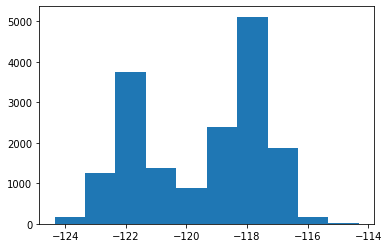

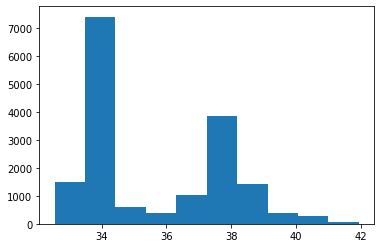

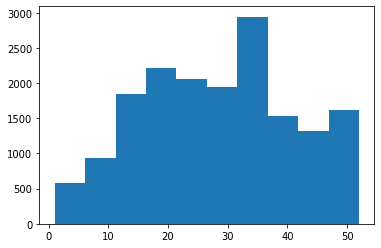

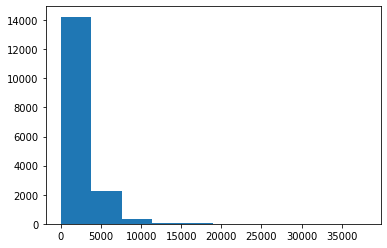

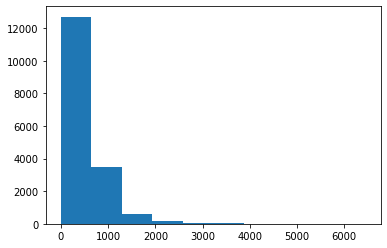

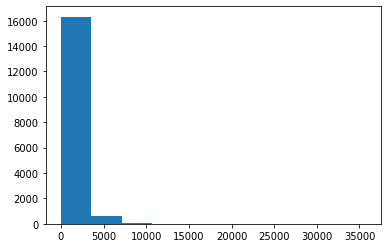

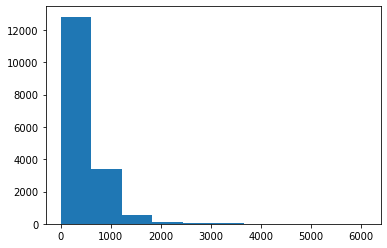

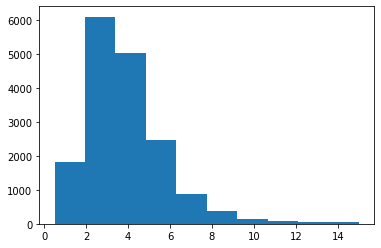

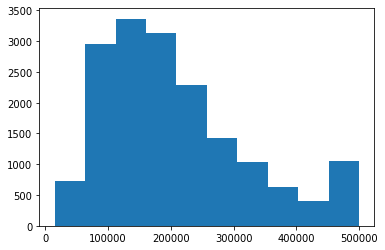

In [37]:
for col in df.columns:
    plt.hist(df[col])
    plt.show()

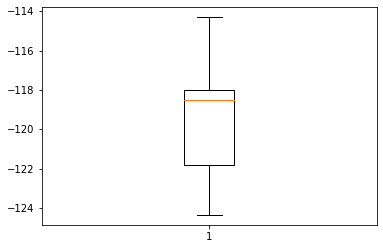

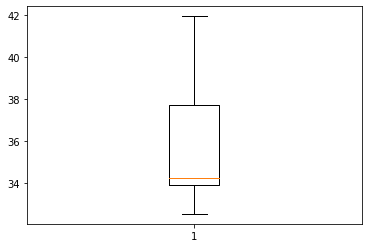

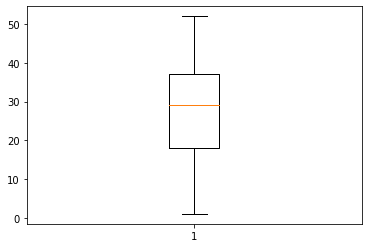

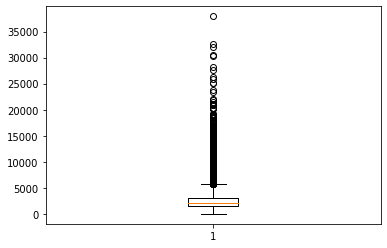

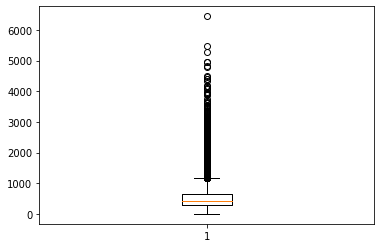

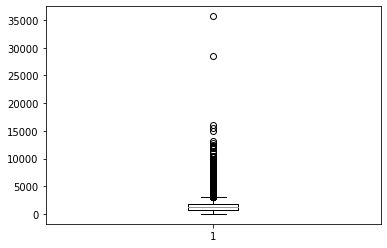

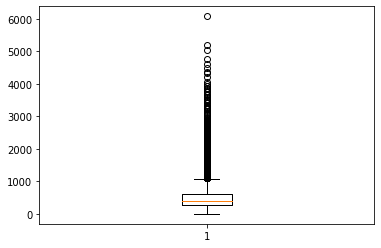

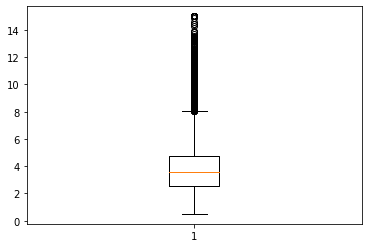

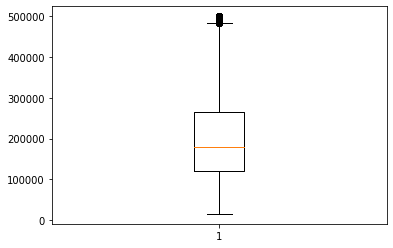

In [38]:
for col in df.columns:
    plt.boxplot(df[col])
    plt.show()

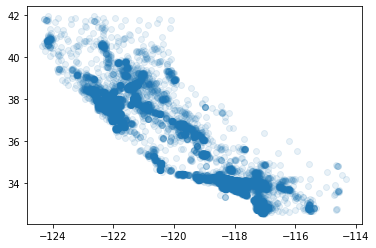

In [39]:
plt.scatter(x=df["longitude"], y=df["latitude"], alpha=0.1)
plt.show()

In [40]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [41]:
imputer = SimpleImputer(strategy="mean")
imputer.fit(df)

# Da es keine null values gibt, ist der imputer eine null operation
print((np.abs(imputer.transform(df) - df.to_numpy())).sum())

0.0


In [42]:
normalizer = MinMaxScaler()
normalized = normalizer.fit_transform(df)
print("min: ", normalized.min(), "max: ", normalized.max())

min:  0.0 max:  1.0


In [43]:
stdizer = StandardScaler()
scaled = stdizer.fit_transform(df)
print("mean: ", round(scaled.mean(), 8))
print("var: ", round(scaled.var(), 8))

mean:  -0.0
var:  1.0


### Aufgabe 5: Label Encoding
    
Wir möchten die kategorischen Daten unseres Herz Datensatzes encoden. 

1. Welchen Encoder benutzen Sie für welche Daten?
2. Encoden Sie die Daten.

In [58]:
types = heart_data.dtypes
cat_variables = types[types == "object"]
cat_variables

Sex               object
ChestPainType     object
RestingECG        object
ExerciseAngina    object
ST_Slope          object
dtype: object

#### Für Binäre Variablen macht es keinen Unterschied ob wir sie nominal oder ordinal behandeln, da hier das Problem einer artifiziellen Reihung nicht auftritt. Aus Effizienzgründen wählen wir das Label encoding.

In [64]:
ordinal = ["Sex", "ExerciseAngina", "ST_Slope"]
nominal = ["RestingECG", "ChestPainType"]

In [68]:
ord_enc = OrdinalEncoder()

ord_enc.fit(heart_data[ordinal])
print(
    ord_enc.categories_
)  # Wir haben nan values, die wir in echten Anwendungen filtern müssen

ord_enc.transform(heart_data[ordinal])

[array(['F', 'M', nan], dtype=object), array(['N', 'Y', nan], dtype=object), array(['Down', 'Flat', 'Up', nan], dtype=object)]


array([[1., 0., 2.],
       [0., 0., 1.],
       [1., 0., 2.],
       ...,
       [1., 1., 1.],
       [0., 0., 1.],
       [1., 0., 2.]])

In [73]:
one_hot_enc = OneHotEncoder(sparse=False)

one_hot_enc.fit(heart_data[nominal])
print(
    one_hot_enc.categories_
)  # Wir haben nan values, die wir in echten Anwendungen filtern müssen

one_hot_enc.transform(heart_data[nominal])

[array(['LVH', 'Normal', 'ST', nan], dtype=object), array(['ASY', 'ATA', 'NAP', 'TA', nan], dtype=object)]


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])